# Лабораторная работа 6

## 1. Выбор начальных условий

### a. набор данных

Был выбран датасет классификации эмоций человека. Задача может иметь множество приложений в реальной жизни. Например, подобная система может использоваться для анализа и предсказания поведения людей

https://www.kaggle.com/datasets/sayakbera/fer-2013-7-emotions-uniform-dataset

In [ ]:
!pip install kaggle
!pip install pandas

In [3]:
!kaggle datasets download -d sayakbera/fer-2013-7-emotions-uniform-dataset -p data --unzip

Dataset URL: https://www.kaggle.com/datasets/sayakbera/fer-2013-7-emotions-uniform-dataset
License(s): unknown


In [5]:
!pip install torch
!pip install torchvision

  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached MarkupSafe-3.0.2-cp313-cp313-win_amd64.whl.metadata (4.1 kB)
   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.5/204.1 MB 1.6 MB/s eta 0:02:06
   ---------------------------------------- 1.3/204.1 MB 3.2 MB/s eta 0:01:04
    --------------------------------------- 2.6/204.1 MB 4.8 MB/s eta 0:00:43
    --------------------------------------- 2.6/204.1 MB 4.8 MB/s eta 0:00:43
    --------------------------------------- 5.0/204.1 MB 4.8 MB/s eta 0:00:42
   - -------------------------------------- 5.8/204.1 MB 4.6 MB/s eta 0:00:44
   - -------------------------------------- 7.9/204.1 MB 5.4 MB/s eta 0:00:37
   - --------------------------

Посмотрим статистику по классам в датасете

In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.ImageFolder(root="data/FER2013_7emotions_Uniform_Augmented_Dataset/train", transform=transform)
val_data = datasets.ImageFolder(root="data/FER2013_7emotions_Uniform_Augmented_Dataset/validation", transform=transform)
test_data = datasets.ImageFolder(root="data/FER2013_7emotions_Uniform_Augmented_Dataset/test", transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

print("классы -", train_data.classes)
print("картинок в train:", len(train_data))
print("картинок в val:", len(val_data))
print("картинок в test:", len(test_data))


классы - ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']
картинок в train: 56000
картинок в val: 7000
картинок в test: 7000


In [10]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.6 MB/s eta 0:00:05
   ------- -------------------------------- 1.6/8.1 MB 2.6 MB/s eta 0:00:03
   ------------- -------------------------- 2.6/8.1 MB 3.5 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/8.1 MB 3.5 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 3.7 MB/s eta 0:00:02
   ------------------------------- -------- 6.3/8.1 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 5.0 MB/s eta 0:00:01
   -------------------------------------

Посмотрим на несколько изображений из датасета:

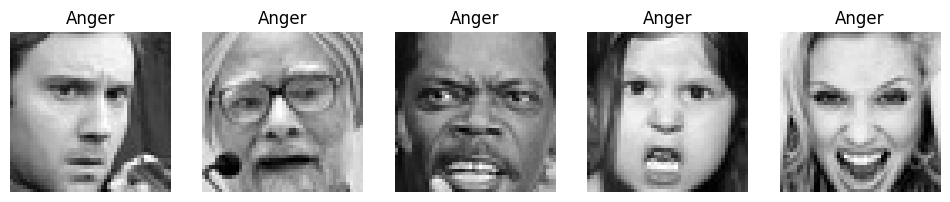

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img.numpy().squeeze()
    plt.imshow(img, cmap="gray")
    plt.axis("off")

fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for i in range(5):
    img, label = train_data[i]
    axes[i].imshow(img.numpy().squeeze(), cmap="gray")
    axes[i].set_title(train_data.classes[label])
    axes[i].axis("off")
plt.show()


### b. Метрики качества

В качестве метрики качества будем использовать accuracy - как показатель верно угаданных классов.

## 2. Создание бейзлайна и оценка качества


In [24]:
!pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.6.0%2Bcu118-cp313-cp313-win_amd64.whl.metadata (28 kB)
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.21.0%2Bcu118-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
   ---------------------------------------- 0.0/2.7 GB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 GB 37.7 MB/s eta 0:01:13
   ---------------------------------------- 0.0/2.7 GB 51.3 MB/s eta 0:00:53
   ---------------------------------------- 0.0/2.7 GB 47.3 MB/s eta 0:00:58
    --------------------------------------- 0.0/2.7 GB 58.0 MB/s eta 0:00:47
    --------------------------------------- 0.1/2.7 GB 61.4 MB/s eta 0:00:44
   - -------------------------------------- 0.1/2.7 GB 62.4 MB/s eta 0:00:43
   - -------------------------------------- 0.1/2.7 GB 62.0 MB/s eta 0:00:43
   - -------------------------------------- 0.1/2.7 GB 62.8 MB/s eta 0:00:42
   - ---------

Пробуем использовать cuda для torch. Инициализируем transform:
- с переводом в greyscale;
- ресайз до 224 на 224 (на чем была обучена бейзлайн модель);
- в формат tensor;
- с нормализацией.

Инициализируем даталоадеры для train выборки и validation выборки.

In [2]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.models import resnet18, vit_b_16
import torch.nn as nn
import torch.optim as optim
#import random
#from torch.utils.data import Subset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
vit_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
train_data = datasets.ImageFolder("data/FER2013_7emotions_Uniform_Augmented_Dataset/train", transform=transform)
train_data_vit = datasets.ImageFolder("data/FER2013_7emotions_Uniform_Augmented_Dataset/train", transform=vit_transform)

#subset = random.sample(range(len(train_data)), int(0.2 * len(train_data)))
#train_subset = Subset(train_data, subset) ###
# batchsize будет 32
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
train_loader_vit = DataLoader(train_data_vit, batch_size=32, shuffle=True)
#val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

num_classes = len(train_data.classes)


device: cuda


В качестве сверточной модели будем использовать resnet18. скачаем ее и сделаем свою функцию для обучения

In [3]:
# загружаем модель resnet, меняем ей входной слой
model_cnn = resnet18(pretrained=True)
model_cnn.fc = nn.Linear(model_cnn.fc.in_features, num_classes)

#отправляем на gpu
model_cnn.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=0.01) #lr пока поставим 0.01

#фнукция для обучения моделей с промежуточным выводом
def train_model(model, train_loader, val_loader, optimizer, epochs=3):
    for epoch in range(epochs):
        model.train()
        total_loss, total_correct = 0, 0

        total = len(train_loader)
        i = 0
        for images, labels in train_loader:
            if i % 250 == 0:
                print(i,"/", total)
            i+=1
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            total_correct += (outputs.argmax(1) == labels).sum().item()

        print(f"epoch {epoch+1}: loss: {total_loss/len(train_loader):.4f}, accuracy- {total_correct/len(train_data):.4f}")



d:\Code\AI_labs_2\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Code\AI_labs_2\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Теперь запустим обучение

In [ ]:
train_model(model_cnn, train_loader, None, optimizer=optimizer, epochs=5)

0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 1: loss: 1.9463, accuracy- 0.1890
0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 2: loss: 1.7097, accuracy- 0.3270
0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 3: loss: 1.2993, accuracy- 0.5103
0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 4: loss: 1.1050, accuracy- 0.5815
0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 5: loss: 0.9655, accuracy- 0.6378


Получаем неплохой итоговый accuracy = 0.6378, loss 0.965 после 5 эпох с lr=0.01. Видна положительная динамика и можно сделать вывод, что при большем числе эпох accuracy будет еще выше.

Теперь загрузим трансформерную модель - будем использовать ViT.

In [12]:
model_vit = vit_b_16(pretrained=True)
model_vit.heads.head = nn.Linear(model_vit.heads.head.in_features, num_classes)


model_vit.to(device)

# используем SGD
optimizer_vit = optim.SGD(model_vit.parameters(), lr=0.001, momentum=0.9)

d:\Code\AI_labs_2\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Запускаем обучение на 3 эпохах (т.к. обучение занимает слишком продолжительное время на моей машине)

In [9]:
train_model(model_vit, train_loader_vit, None, optimizer=optimizer_vit, epochs=3)

0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 1: loss: 1.7775, accuracy- 0.3120
0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 2: loss: 1.6087, accuracy- 0.4076
0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 3: loss: 1.5410, accuracy- 0.4349


Получаем accuracy = 0.4349, можно сделать вывод, что при большем числе эпох можно получить результат, близкий к 0.5

## 3. Улучшение бейзлайна

### Гипотезы
Добавим `RandomHorizontalFlip` (случайное отображение по горизонтали), `RandomRotation` (случайный поворот), `RandomCrop` (случайное обрезание), чтобы обучать на более разнообразных изображениях - это должно улучшить accuracy.

Так же поменяем learning rate, добавим scheduler

In [ ]:
from torchvision import transforms

# добавляем случайности
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(224, scale=(0.9, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

vit_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(224, scale=(0.9, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

train_data = datasets.ImageFolder("data/FER2013_7emotions_Uniform_Augmented_Dataset/train", transform=train_transform)
# val_data = datasets.ImageFolder("data/FER2013_7emotions_Uniform_Augmented_Dataset/validation", transform=val_transform)
train_data_vit = datasets.ImageFolder("data/FER2013_7emotions_Uniform_Augmented_Dataset/train", transform=vit_transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
train_loader_vit = DataLoader(train_data_vit, batch_size=32, shuffle=True)
# val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

Обучим бейзлайн ResNet модель с использованием предложенных гипотез улучшения:

In [11]:
from torchvision.models import resnet18
model = resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)
criterion = nn.CrossEntropyLoss()

d:\Code\AI_labs_2\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Code\AI_labs_2\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


train_model с возможностью выполнять scheduler.step()

In [5]:
def train_model(model, train_loader, val_loader, optimizer, epochs=5):
    for epoch in range(epochs):
        model.train()
        train_loss, train_correct = 0, 0
        total = len(train_loader)
        i = 0
        for images, labels in train_loader:
            if i % 250 == 0:
                print(i,"/", total)
            i+=1
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_correct += (outputs.argmax(1) == labels).sum().item()
        
        scheduler.step()
        print(f"epoch {epoch+1}: loss: {train_loss/len(train_loader):.4f}, accuracy- {train_correct/len(train_data):.4f}")

Запуск обучения

In [17]:
train_model(model, train_loader, None, optimizer=optimizer, epochs=5)

0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 1: loss: 1.3059, accuracy- 0.5071
0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 2: loss: 1.0888, accuracy- 0.5927
0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 3: loss: 0.9834, accuracy- 0.6306
0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 4: loss: 0.8243, accuracy- 0.6901
0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 5: loss: 0.7588, accuracy- 0.7152


Получаем accuracy = 0.7152, что больше, чем без улучшений. Значит, что рандомизация и scheduler действительно помогли улучшить бейзлайн.

Теперь проделаем тот же алгоритм для ViT модели:

In [19]:
model_vit = vit_b_16(pretrained=True)
model_vit.heads.head = nn.Linear(model_vit.heads.head.in_features, len(train_data.classes))
model_vit.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_vit = optim.SGD(model_vit.parameters(), lr=0.0001, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)


d:\Code\AI_labs_2\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Code\AI_labs_2\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Обучим модель:

In [20]:
train_model(model_vit, train_loader_vit, None, optimizer=optimizer_vit, epochs=3)

0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 1: loss: 1.4465, accuracy- 0.4555
0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 2: loss: 1.1229, accuracy- 0.5782
0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 3: loss: 0.9972, accuracy- 0.6272


Получаем accuracy = 0.6272, что так же больше, чем в бейзлайне. Удалось сильно улучшить уровень точности модели, оставив для обучения те же 3 эпохи.

## 4. Имплементация алгоритма машинного обучения


На данном шаге самостоятельно имплементируем сверточную и трансформер модели машинного обучения.

In [3]:
import torch.nn as nn
import torch.nn.functional as F

class MyCNN(nn.Module):
    def __init__(self, num_classes):
        super(MyCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2)
        )

        self.dropout = nn.Dropout(0.4)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 28 * 28, 256)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = self.dropout(x)
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x



Самостоятельная имплементация трансформера:

In [ ]:
class PatchEmbedding(nn.Module):
    def __init__(self, in_channels=3, patch_size=16, emb_size=256, img_size=224):
        super().__init__()
        self.patch_size = patch_size
        self.proj = nn.Conv2d(in_channels, emb_size, kernel_size=patch_size, stride=patch_size)
        self.cls_token = nn.Parameter(torch.randn(1, 1,emb_size))
        num_patches = (img_size // patch_size)**2
        self.pos_emb = nn.Parameter(torch.randn(1, num_patches +1,emb_size))

    def forward(self, x):
        B = x.size(0)
        x = self.proj(x).flatten(2).transpose(1, 2)
        cls_token = self.cls_token.expand(B, -1, -1)
        x = torch.cat([cls_token, x], dim=1)
        return x + self.pos_emb
class TransformerEncoder(nn.Module):
    def __init__(self, emb_size=256, heads=4, dropout=0.1):
        super().__init__()
        self.attn = nn.MultiheadAttention(emb_size, heads, dropout=dropout,   batch_first=True)
        self.norm1 = nn.LayerNorm(emb_size)
        self.norm2 = nn.LayerNorm(emb_size)
        self.ff = nn.Sequential(
            nn.Linear(emb_size, emb_size * 4),
            nn.ReLU(),
            nn.Linear(emb_size * 4, emb_size)
        )
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        attn_output, _ = self.attn(x, x, x)
        x = self.norm1(x + self.dropout(attn_output))
        x = self.norm2(x + self.dropout(self.ff(x)))
        return x
#делаем свой трансфомер
class MyViT(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_channels=3 ,  num_classes=7, emb_size=256,  depth=6):
        super().__init__()
        self.patch_embed = PatchEmbedding(in_channels, patch_size, emb_size, img_size)
        self.transformer = nn.Sequential(*[TransformerEncoder(emb_size) for _ in range(depth)])
        self.mlp_head = nn.Sequential(
            nn.LayerNorm(emb_size),
            nn.Linear(emb_size, num_classes)
        )
    def forward(self, x):
        x = self.patch_embed(x)
        x = self.transformer(x)
        return self.mlp_head(x[:, 0])


Создадим экземпляры классов CNN и ViT моделей:

In [5]:
cnn_model = MyCNN(num_classes=len(train_data.classes)).to(device)
vit_model = MyViT(num_classes=len(train_data.classes)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.0001)
optimizer_vit = optim.SGD(vit_model.parameters(), lr=0.001, momentum=0.9)

In [6]:
def train_model(model, train_loader, val_loader, optimizer, epochs=3):
    for epoch in range(epochs):
        model.train()
        total_loss, total_correct = 0, 0

        total = len(train_loader)
        i = 0
        for images, labels in train_loader:
            if i % 250 == 0:
                print(i,"/", total)
            i+=1
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            total_correct += (outputs.argmax(1) == labels).sum().item()

        print(f"epoch {epoch+1}: loss: {total_loss/len(train_loader):.4f}, accuracy- {total_correct/len(train_data):.4f}")

In [7]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
vit_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
train_data = datasets.ImageFolder("data/FER2013_7emotions_Uniform_Augmented_Dataset/train", transform=transform)
train_data_vit = datasets.ImageFolder("data/FER2013_7emotions_Uniform_Augmented_Dataset/train", transform=vit_transform)

#subset = random.sample(range(len(train_data)), int(0.2 * len(train_data)))
#train_subset = Subset(train_data, subset) ###
# batchsize будет 32
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
train_loader_vit = DataLoader(train_data_vit, batch_size=32, shuffle=True)

Обучим модели и проверим полученный accuracy:

In [ ]:
train_model(cnn_model, train_loader, None, optimizer=optimizer, epochs=5)

0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 1: loss: 1.5231, accuracy- 0.4167
0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 2: loss: 1.1346, accuracy- 0.5743
0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 3: loss: 0.8201, accuracy- 0.7003
0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 4: loss: 0.5079, accuracy- 0.8222
0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 5: loss: 0.2898, accuracy- 0.9040


Удалось добавиться очень хорошего показателя accuracy = 0.9040

In [ ]:
train_model(vit_model, train_loader_vit, None, optimizer=optimizer_vit, epochs=3)

0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 1: loss: 1.9398, accuracy- 0.1857
0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 2: loss: 1.8996, accuracy- 0.2134
0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 3: loss: 1.8687, accuracy- 0.2370


Получаем низкий accuracy = 0.2370

Примененим техники улучшения бейзлайна, использованные ранее, для самостоятельно имплементированных моделей:

In [ ]:
from torchvision import transforms

# добавляем случайности
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(224, scale=(0.9, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

vit_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(224, scale=(0.9, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

train_data = datasets.ImageFolder("data/FER2013_7emotions_Uniform_Augmented_Dataset/train", transform=train_transform)
train_data_vit = datasets.ImageFolder("data/FER2013_7emotions_Uniform_Augmented_Dataset/train", transform=vit_transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
train_loader_vit = DataLoader(train_data_vit, batch_size=32, shuffle=True)


In [11]:
# Для CNN:
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.0005)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)


In [ ]:
train_model(cnn_model, train_loader, None, optimizer=optimizer, epochs=5)

0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 1: loss: 1.5607, accuracy- 0.4052
0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 2: loss: 1.3927, accuracy- 0.4701
0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 3: loss: 1.3160, accuracy- 0.4999
0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 4: loss: 1.2612, accuracy- 0.5234
0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 5: loss: 1.2114, accuracy- 0.5400


Получаем accuracy = 0.54. Гипотезы не улучшили бейзлайн

In [16]:
# Для ViT:
optimizer = torch.optim.SGD(vit_model.parameters(), lr=0.0005)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)


In [ ]:
train_model(vit_model, train_loader_vit, None, optimizer=optimizer, epochs=3)

0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 1: loss: 1.9464, accuracy- 0.1434
0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 2: loss: 1.9464, accuracy- 0.1434
0 / 1750
250 / 1750
500 / 1750
750 / 1750
1000 / 1750
1250 / 1750
1500 / 1750
epoch 3: loss: 1.9464, accuracy- 0.1411


Можно сделать вывод, что гипотезы не улучшили бейзлайн собственной реализации трансформерной модели.